In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import numpy as np
%matplotlib inline
#plt.style.use('Solarize_Light2')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()


In [3]:
cov = cov = pd.read_csv('new_datav5.csv', sep=';')
cov1 =cov = pd.read_csv('new_datav5.csv', sep=';') 
#cov=cov.drop(['Unnamed: 0'],axis=1)


In [4]:
cov

,date,Senegal,c_jour,C_imp,c_cont,c_com
0,23/01/2020,0,0,0,0,0
1,24/01/2020,0,0,0,0,0
2,25/01/2020,0,0,0,0,0
3,26/01/2020,0,0,0,0,0
4,27/01/2020,0,0,0,0,0
...,...,...,...,...,...,...
59,22/03/2020,67,11,32,32,3
60,23/03/2020,79,12,38,34,7
61,24/03/2020,86,7,41,38,7
62,25/03/2020,99,13,46,46,7


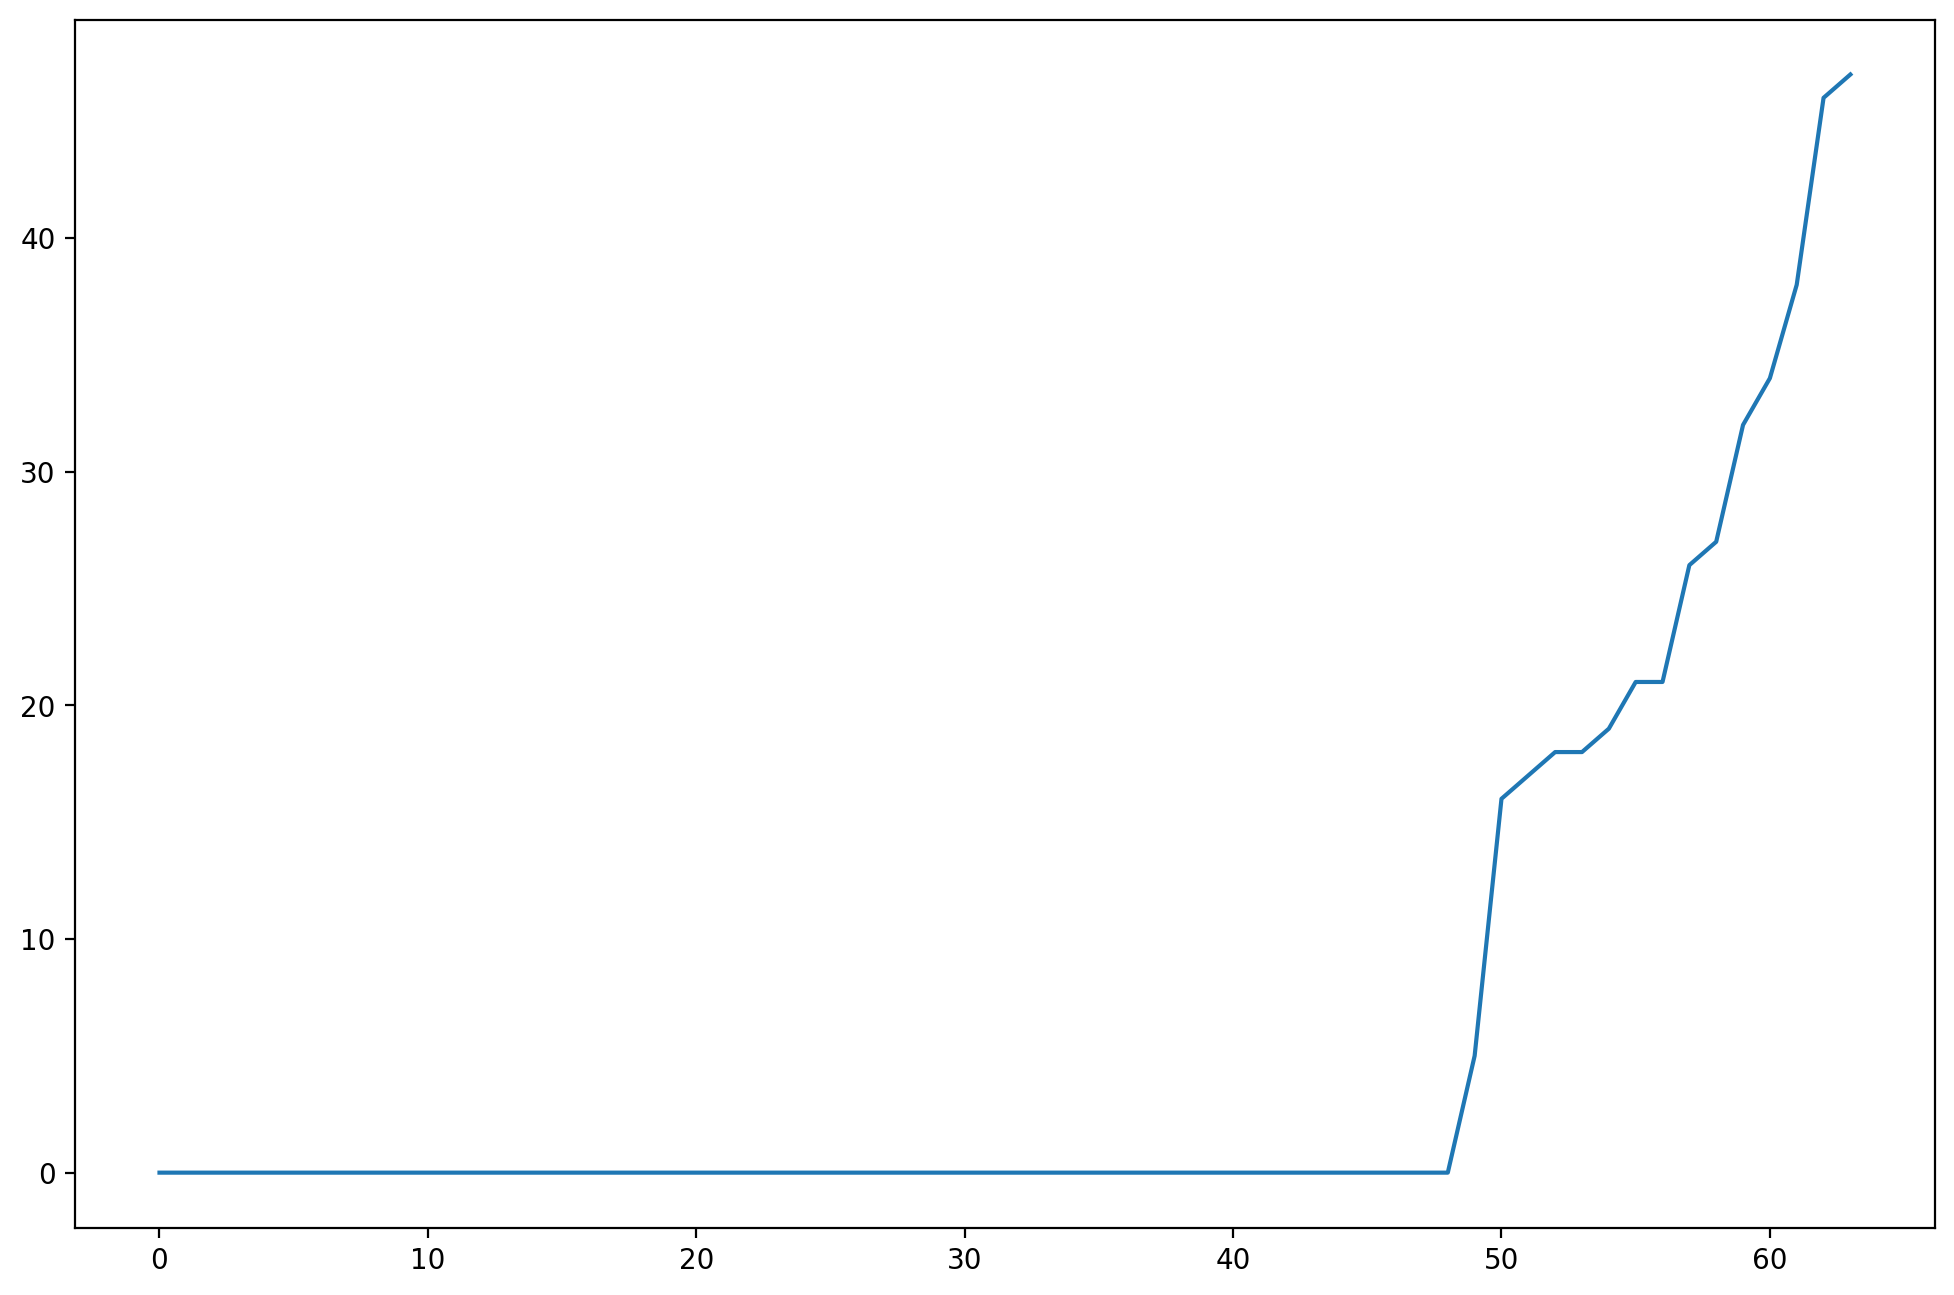

In [5]:
plt.figure(figsize=(12,8),dpi=200)
plt.plot(cov['c_cont'], label="Cases")
plt.show ()

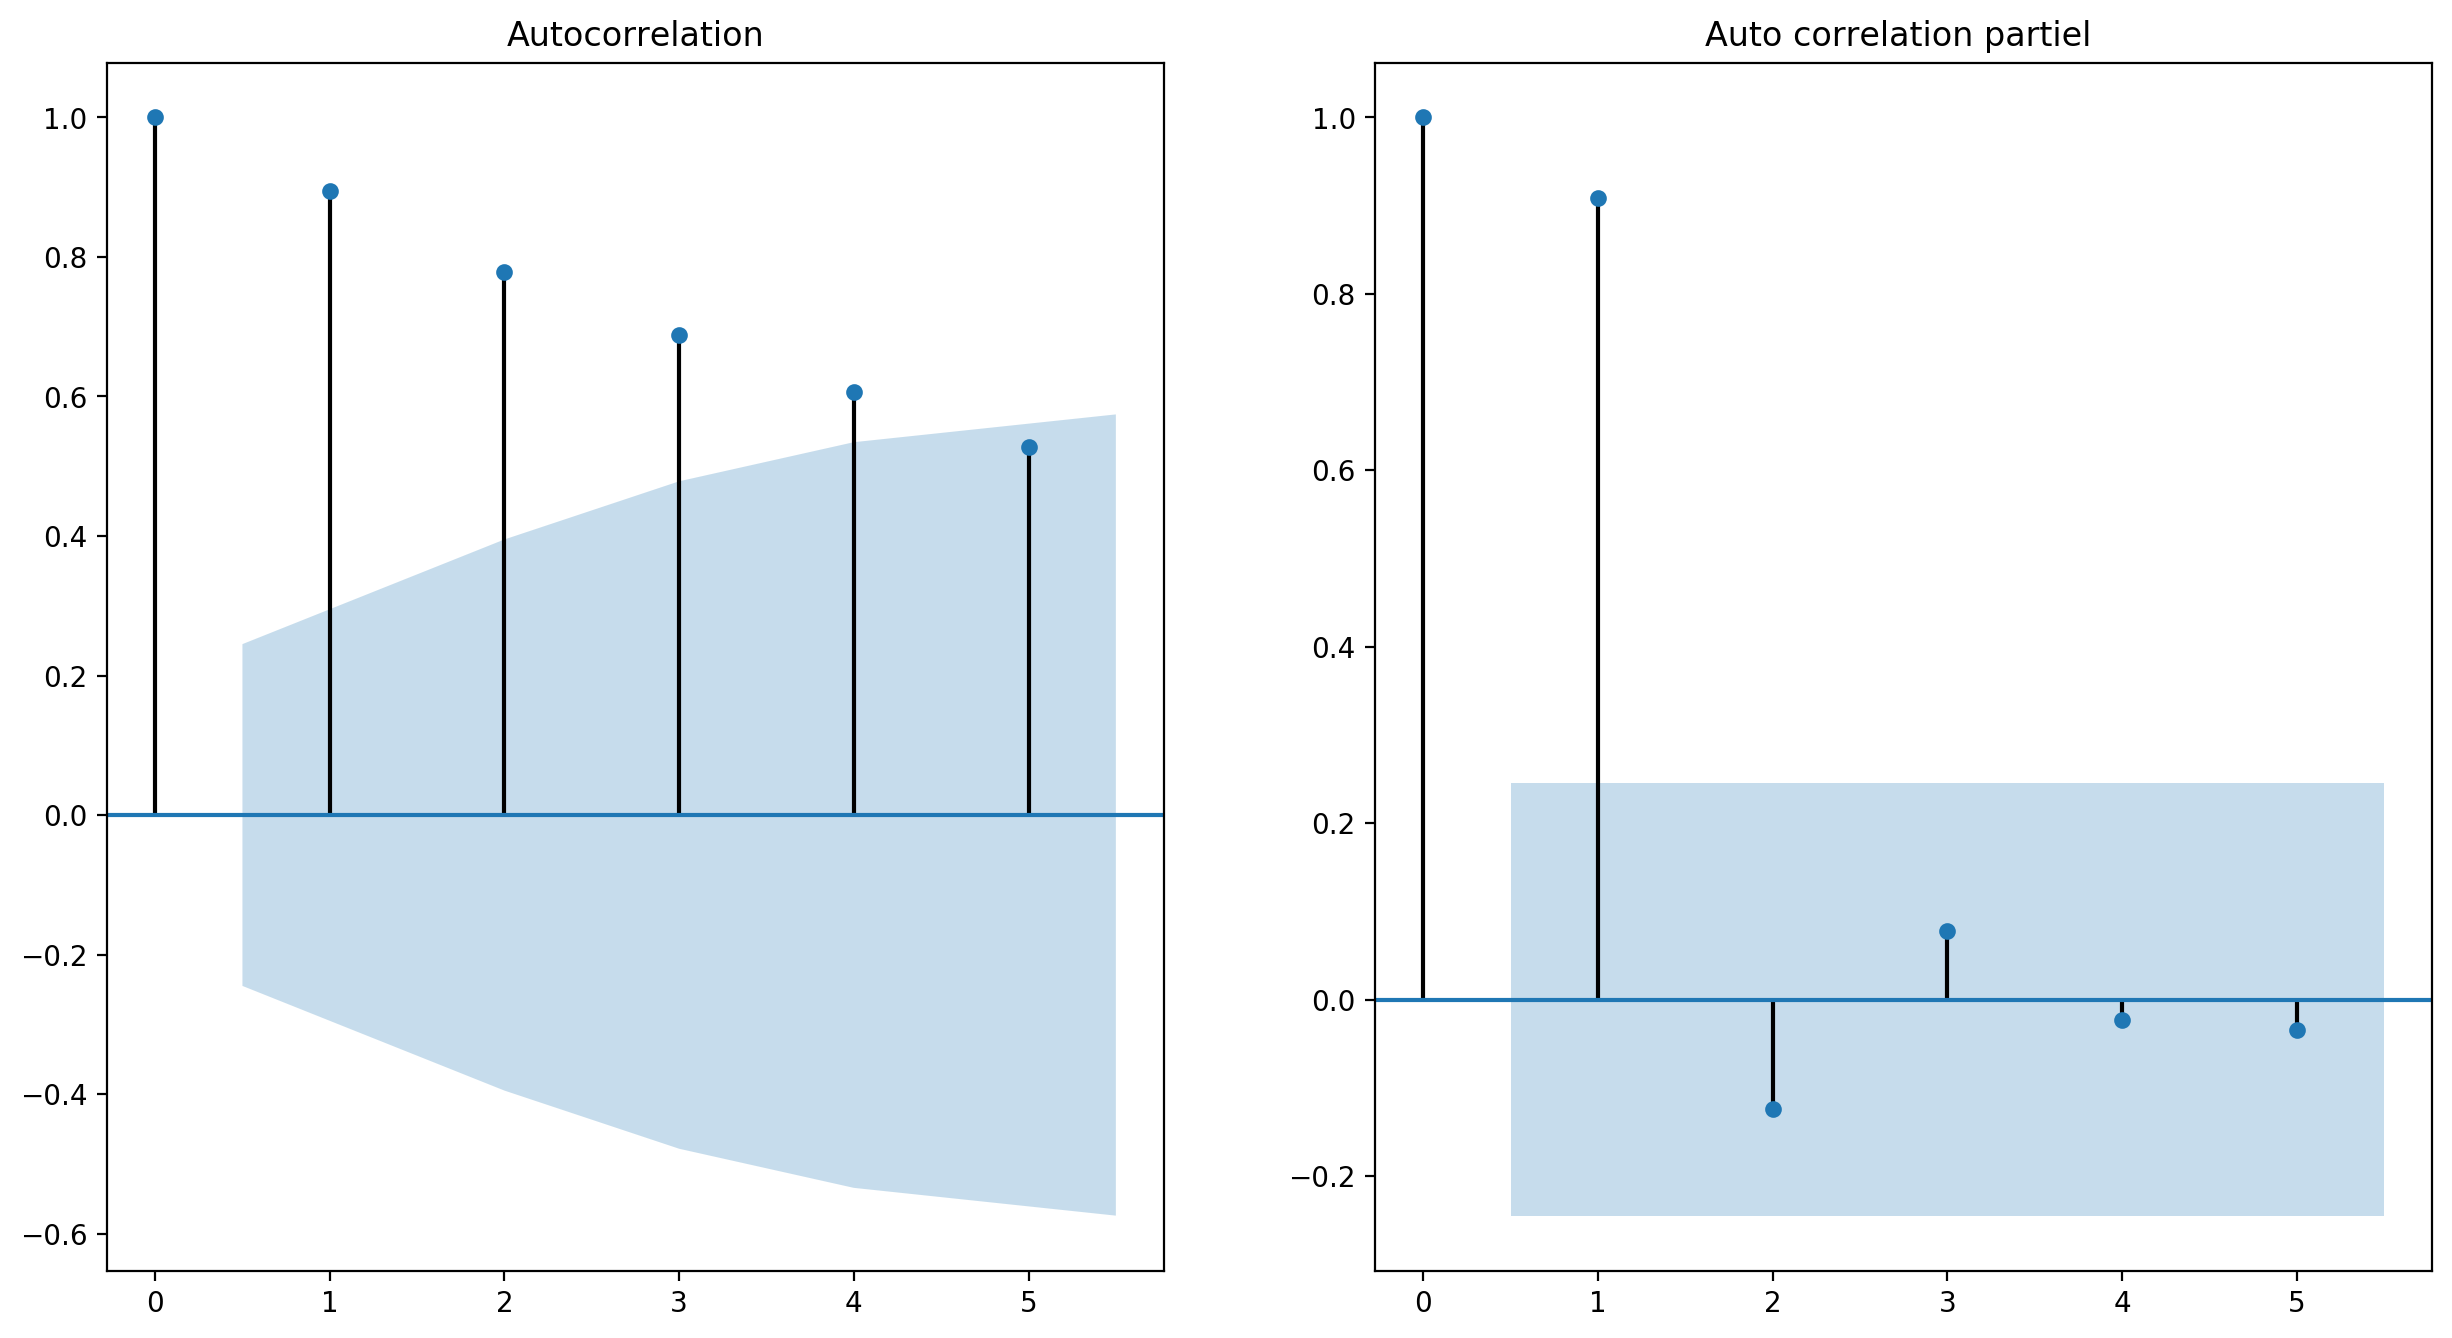

In [6]:
# Auto correlation pariel
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize=(15,8),dpi=200)

fig = sm.graphics.tsa.plot_acf(cov['c_cont'], lags=5, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(cov['c_cont'], lags=5, ax=axes[1])
plt.title("Auto correlation partiel ")
plt.savefig("Auto correlation partiel  ")
plt.show()

# Decomposition Automatique de la serie data_sn

<Figure size 12600x9800 with 0 Axes>

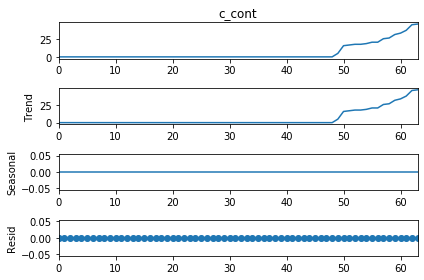

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(cov['c_cont'], freq=1, extrapolate_trend='freq')
print(decomposition)

plt.figure(figsize=(18,14),dpi=700)
decomposition.plot()
#plt.title("Decomposition auomaique de la séerie temporelle data_sn")
#plt.savefig("Decomposition auomaique de la séerie data_sn ")
plt.show()

## Lissage Exponentielle Simple

Le MSE minimal est 5.025271003649964 et la valeur de alpha correspondante est 0.9
Le MSE est 5.025271003649964


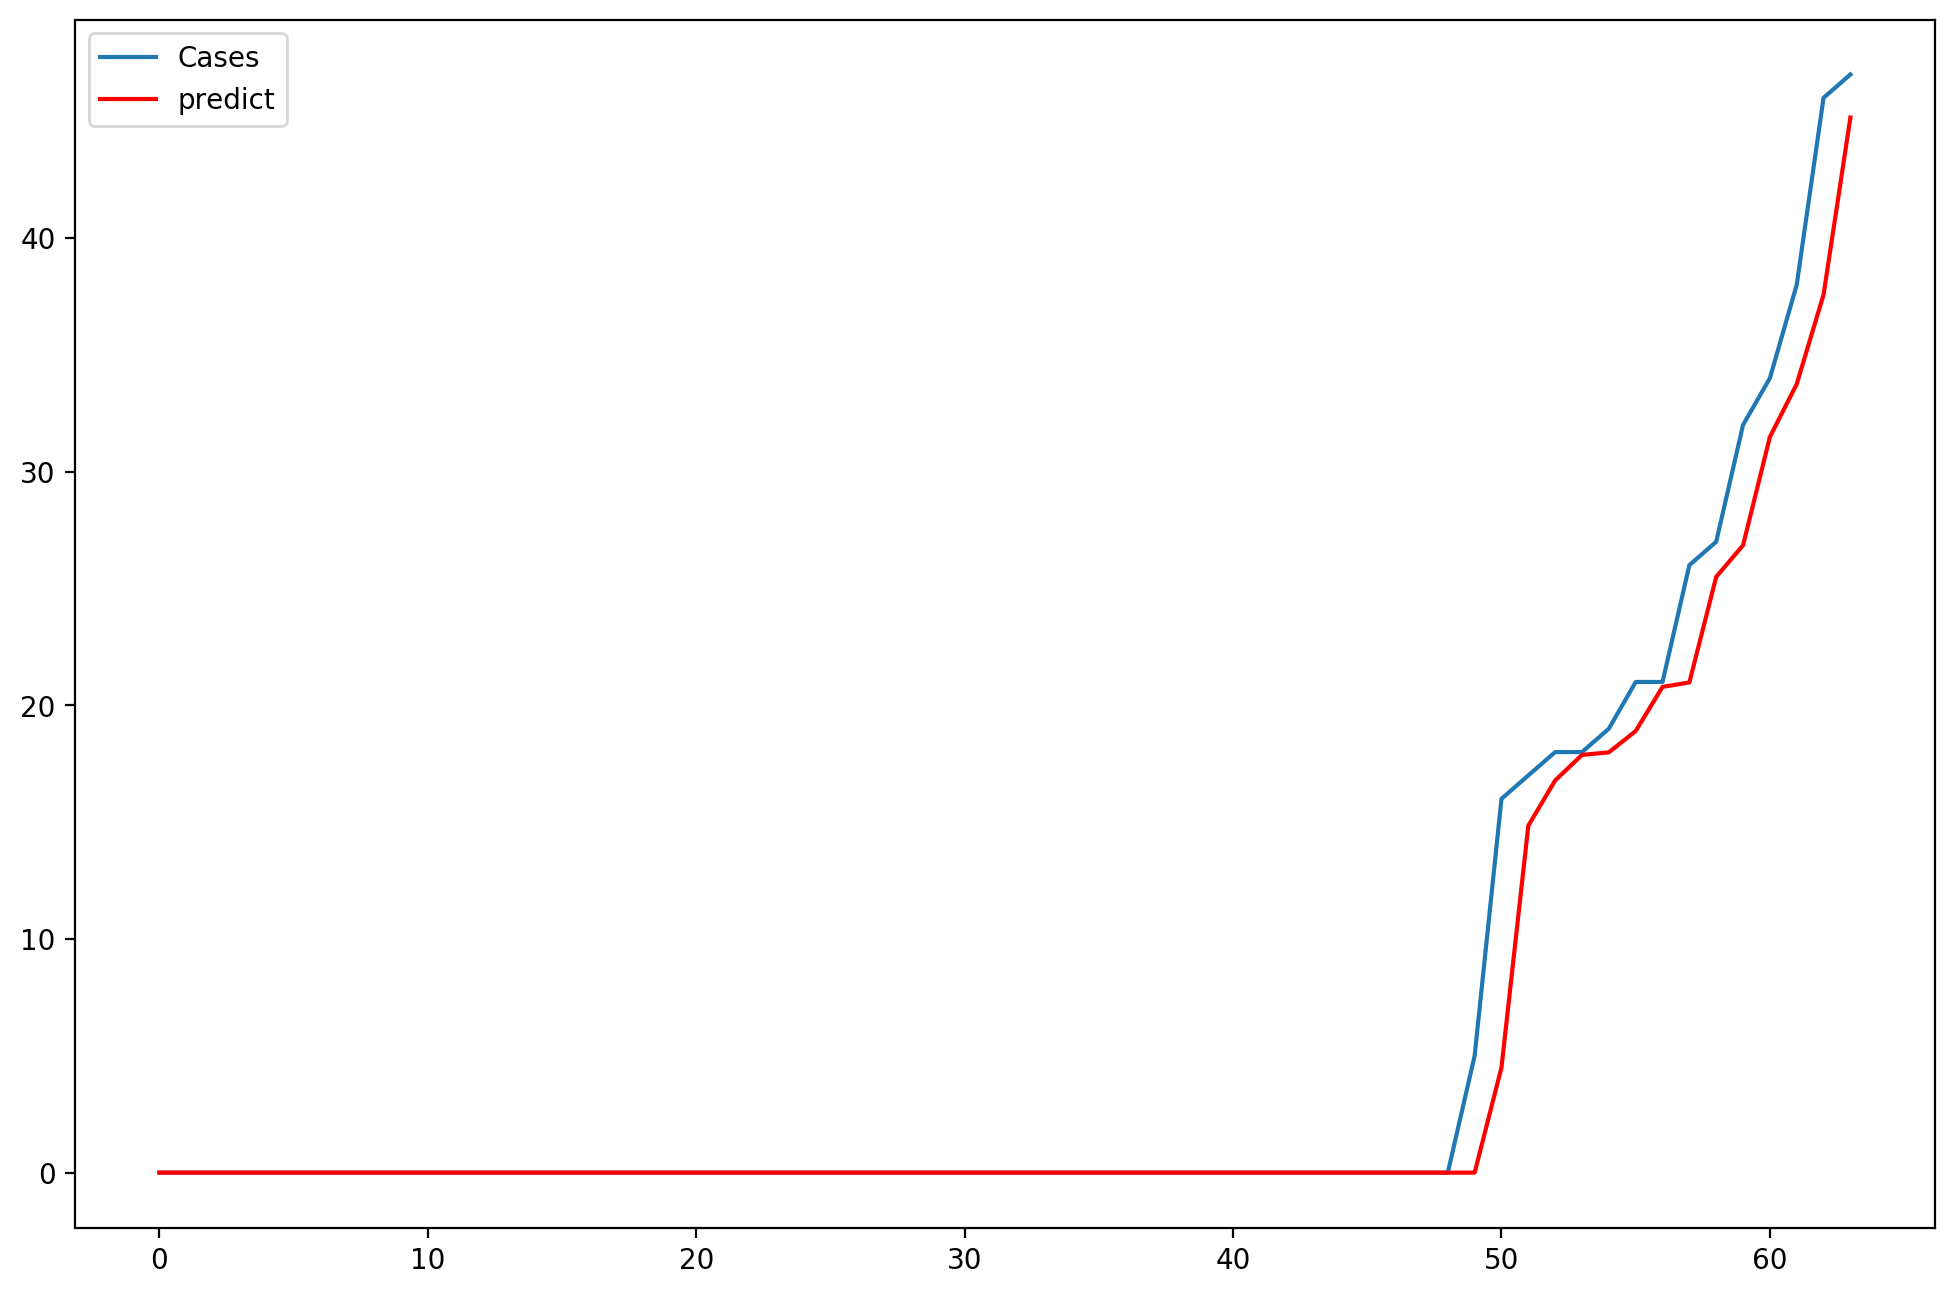

Les prévisions pour les 5 prochains jours sont:
64    46.815748
65    46.815748
66    46.815748
67    46.815748
68    46.815748
dtype: float64 


In [8]:
from sklearn.metrics import mean_squared_error
value_poss=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mse_list=[]
params=[]
for i in value_poss:
        fit = SimpleExpSmoothing(cov['c_cont']).fit(smoothing_level=i)
        predicted=fit.fittedvalues
        error = mean_squared_error(cov['c_cont'], predicted)
        mse_list.append(error)
        params.append(i)
ind=mse_list.index(min(mse_list))
#print(mse_list[ind],params[ind])
print('Le MSE minimal est {0} et la valeur de alpha correspondante est {1}'.format(mse_list[ind],params[ind]))

# Prédiction avec la methode de Holt  avec les meilleurs valeurs de alpha
fit = SimpleExpSmoothing(cov['c_cont']).fit(smoothing_level=params[ind])
predicted=fit.fittedvalues
error = mean_squared_error(cov['c_cont'], predicted)
print( 'Le MSE est {}'.format(error))

# Visualisation de la prévision
plt.figure(figsize=(12,8),dpi=200)
plt.plot(cov['c_cont'], label="Cases") # la courbe des données réelles 
plt.plot(fit.fittedvalues, label="predict",color='red')# la courbe des données prédites
plt.legend()
plt.show ()

## Prédiction pour les 5 prochains jours
fcast = fit.forecast(5)
print( 'Les prévisions pour les 5 prochains jours sont:')
print('{} '.format(fcast))



## Lissage de par la methode de Holt avec Tendance lineaire

Le MSE minimal est 3.2757703506423415 et la valeur de alpha et beta correspondantes sont (0.9, 0.2)
Le MSE est 105.50871861369615


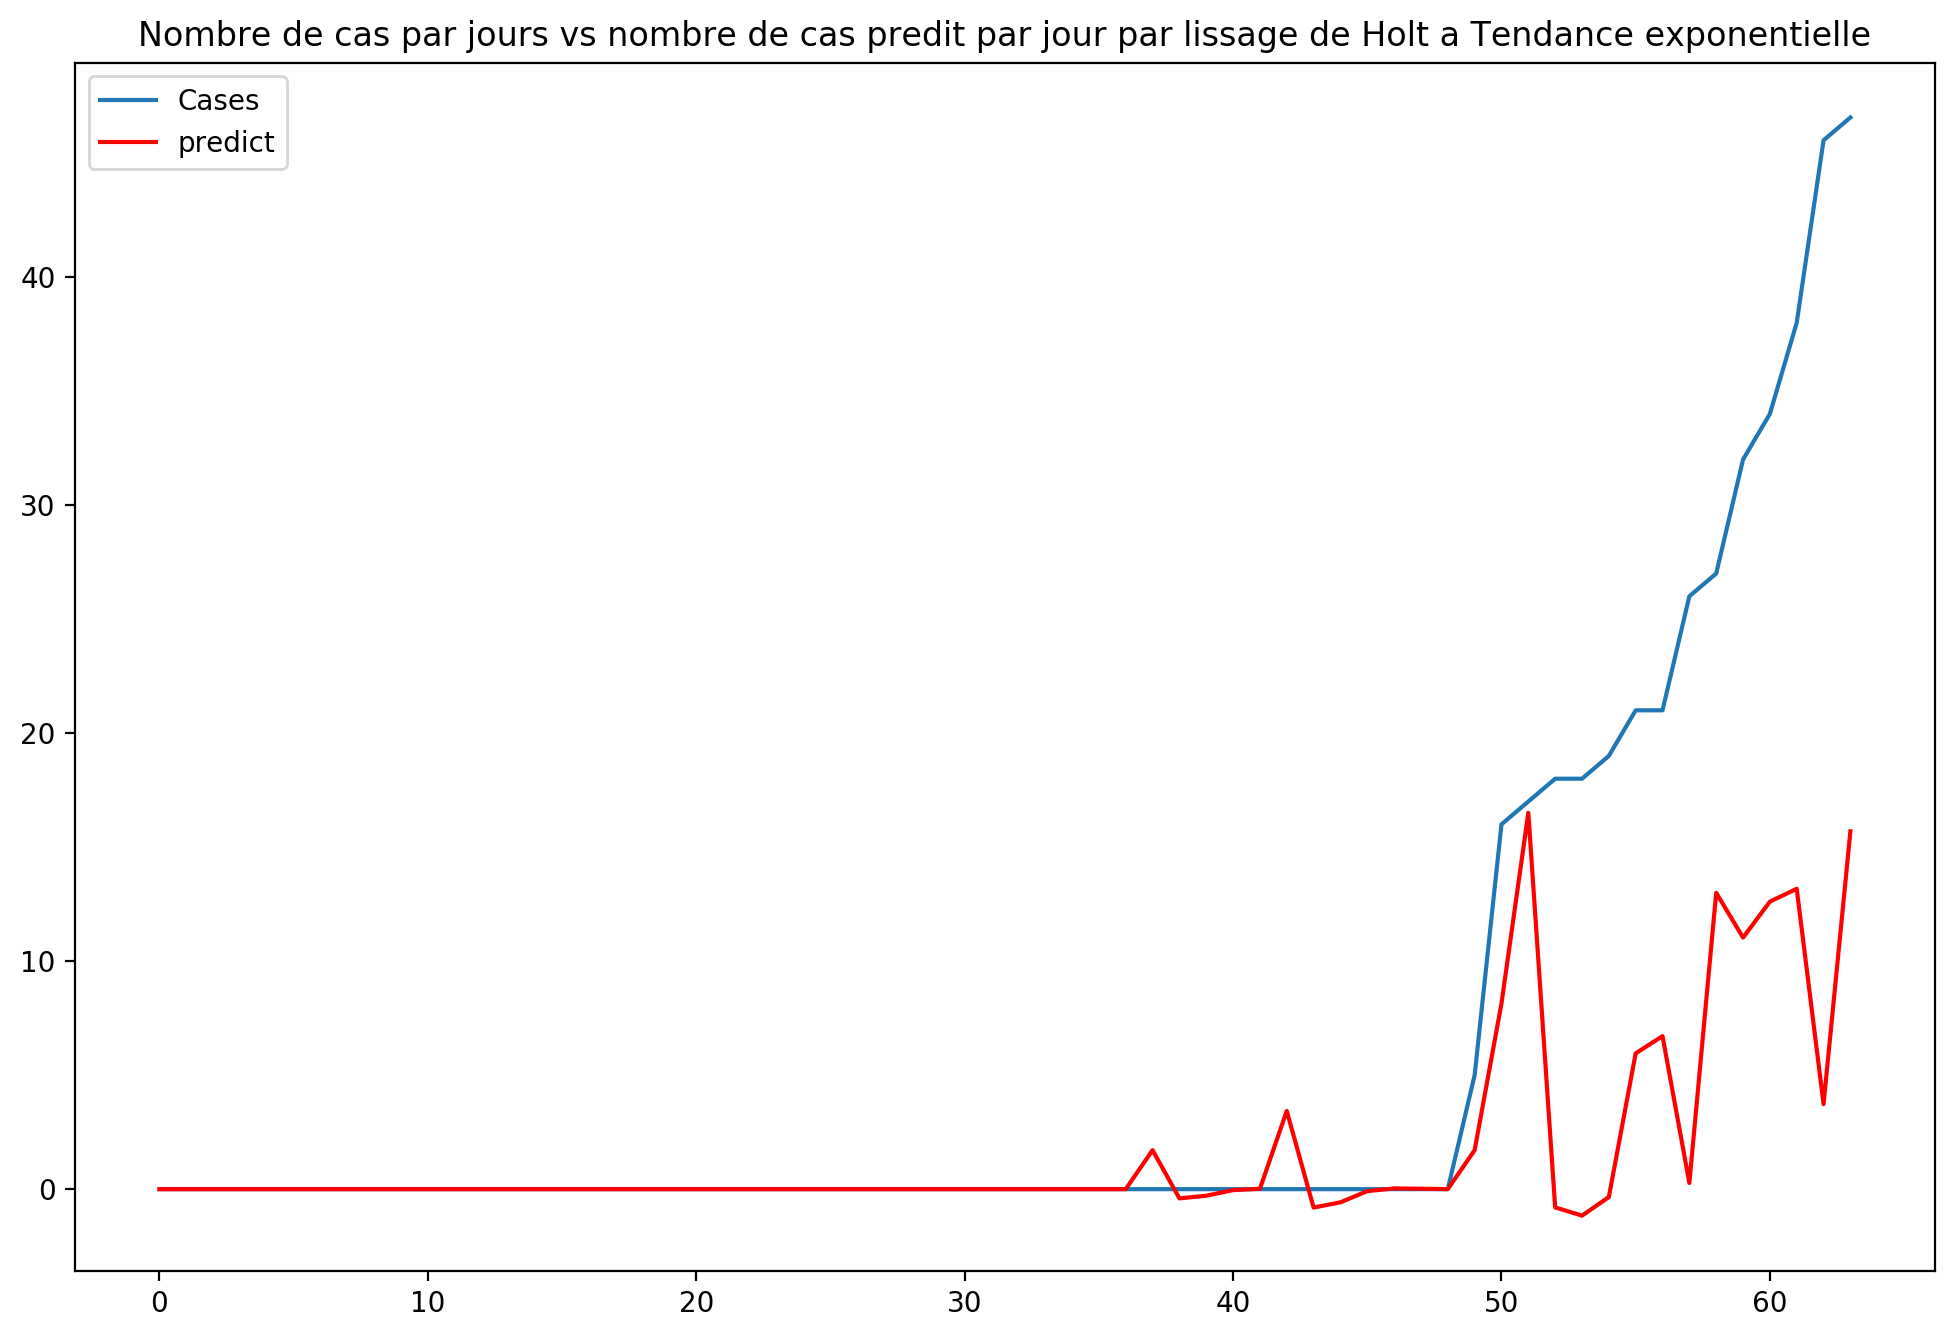

Les prévisions pour les 5 prochains jours sont:
64     2.738370
65    -1.492677
66    -5.723724
67    -9.954770
68   -14.185817
Name: Holt's linear trend, dtype: float64 


In [9]:
#Recherche des meilleurs valeurs des paramètres alpha et beta
#Pour trouver la meilleur valeur de alpha et de beta avec le plus petit MSE nous  essayons tous 
#le valeurs comprises entre 0 et 1 avec un pas de 0.1

value_poss=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
from sklearn.metrics import mean_squared_error
mse_list=[]
params=[]
for i in value_poss:
    for j in value_poss:
        fit1=Holt(cov['c_cont']).fit(smoothing_level=i, smoothing_slope=j, optimized=False)
        predicted=fit1.fittedvalues
        error = mean_squared_error(cov['c_cont'], predicted)
        mse_list.append(error)
        params.append((i,j))
ind=mse_list.index(min(mse_list))
#print(mse_list[ind],params[ind])
print('Le MSE minimal est {0} et la valeur de alpha et beta correspondantes sont {1}'.format(mse_list[ind],params[ind]))

# Prédiction avec la methode de Holt  avec les meilleurs valeurs de alpha et beta
fit1=Holt(cov['c_jour']).fit(smoothing_level=params[ind][0], smoothing_slope=params[ind][0], optimized=False)
predicted=fit1.fittedvalues
error = mean_squared_error(cov['c_cont'], predicted)
print( 'Le MSE est {}'.format(error))


# Visualisation de la prévision
plt.figure(figsize=(12,8),dpi=200)
plt.plot(cov['c_cont'], label="Cases") # la courbe des données réelles 
plt.plot(fit1.fittedvalues, label="predict",color='red')# la courbe des données prédites
plt.title("Nombre de cas par jours vs nombre de cas predit par jour par lissage de Holt a Tendance exponentielle")
plt.legend()
plt.show ()

## Prédiction pour les 5 prochains jours
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
print( 'Les prévisions pour les 5 prochains jours sont:')
      
print('{} '.format(fcast1))


## Lissage de par la methode de Holt avec Tendance exponentielle

Le MSE minimal est 3.721366403376252 et la valeur de alpha et beta correspondantes sont (0.4, 0.9)
Le MSE est 9.410742263716076


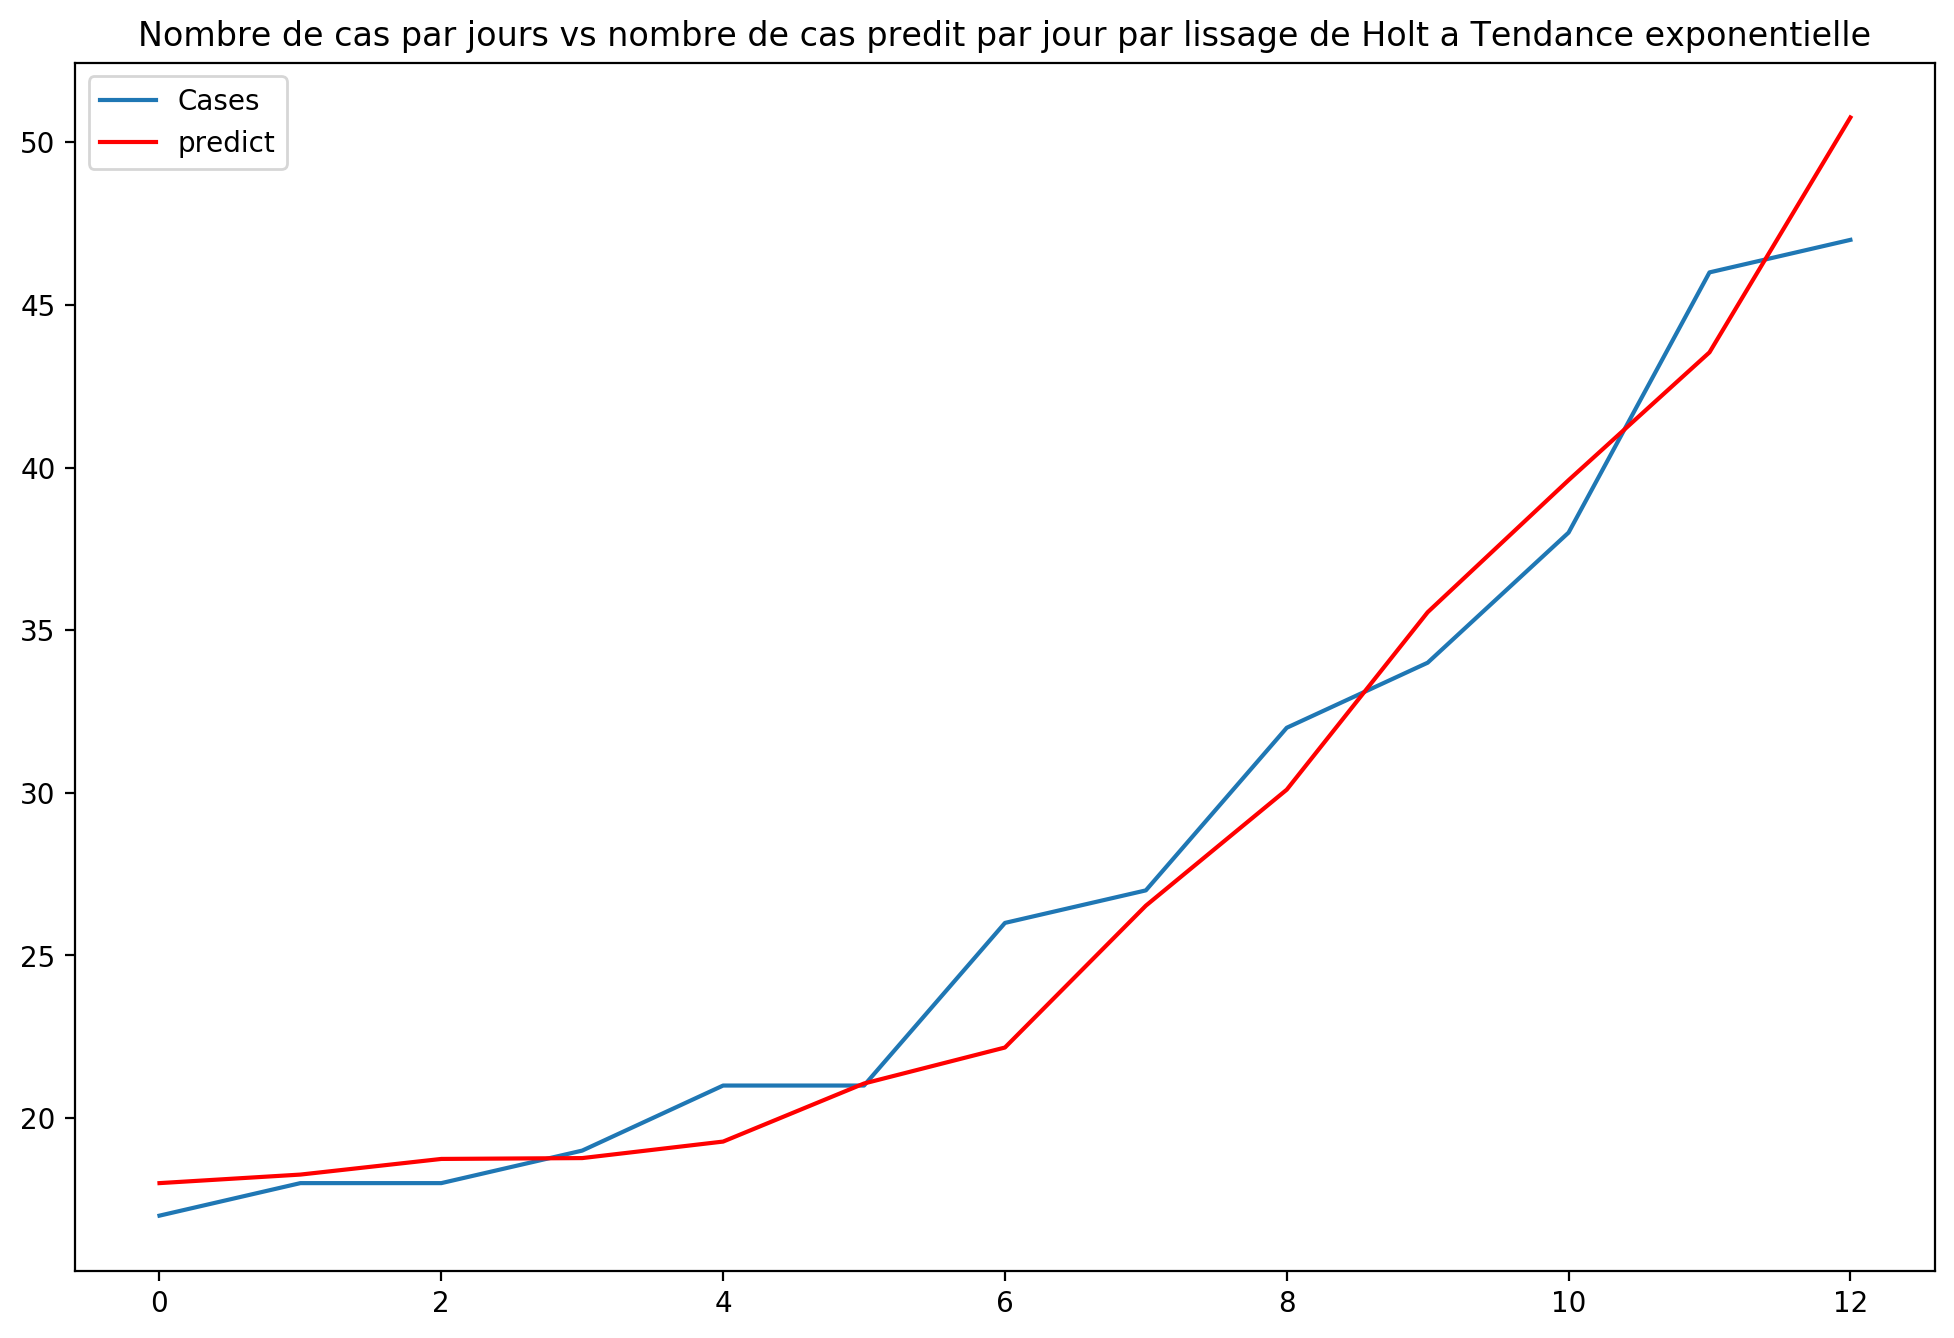

Les prévisions pour les 5 prochains jours sont:
13    54.660101
14    60.654879
15    67.307127
16    74.688953
17    82.880370
Name: Exponential trend, dtype: float64 


In [11]:
data_sn1=cov['c_cont'][51:]
data_sn1=data_sn1.reset_index()
data_sn1=data_sn1.drop(['index'],axis=1)


value_poss=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
from sklearn.metrics import mean_squared_error
mse_list=[]
params=[]
for i in value_poss:
    for j in value_poss:
        fit2 = Holt(data_sn1, exponential=True).fit(smoothing_level=i, smoothing_slope=j, optimized=False)
        #fcast2 = fit2.forecast(5).rename("Exponential trend")
        predicted=fit2.fittedvalues
        error = mean_squared_error(data_sn1, predicted)
        mse_list.append(error)
        params.append((i,j))
ind=mse_list.index(min(mse_list))
#print(mse_list[ind],params[ind])
print('Le MSE minimal est {0} et la valeur de alpha et beta correspondantes sont {1}'.format(mse_list[ind],params[ind]))


fit2 = Holt(data_sn1, exponential=True).fit(smoothing_level=params[ind][0], smoothing_slope=params[ind][1], optimized=False)
fcast2= fit2.forecast(5).rename("Exponential trend")
error = mean_squared_error(data_sn1, predicted)
print( 'Le MSE est {}'.format(error))

# Visualisation de la prévision
plt.figure(figsize=(12,8),dpi=200)
plt.plot(data_sn1, label="Cases") # la courbe des données réelles 
plt.plot(fit2.fittedvalues, label="predict",color='red')# la courbe des données prédites
plt.title("Nombre de cas par jours vs nombre de cas predit par jour par lissage de Holt a Tendance exponentielle")
plt.legend()
plt.show ()

fcast2 = fit2.forecast(5).rename("Exponential trend")
print( 'Les prévisions pour les 5 prochains jours sont:')
      
print('{} '.format(fcast2))


## Lissage de par la methode de Holt avec Tendance amorti

Le MSE minimal est 9.83906043476151 et la valeur de alpha et beta correspondantes sont (0.1, 0.2)
Le MSE est 3.405594736292164


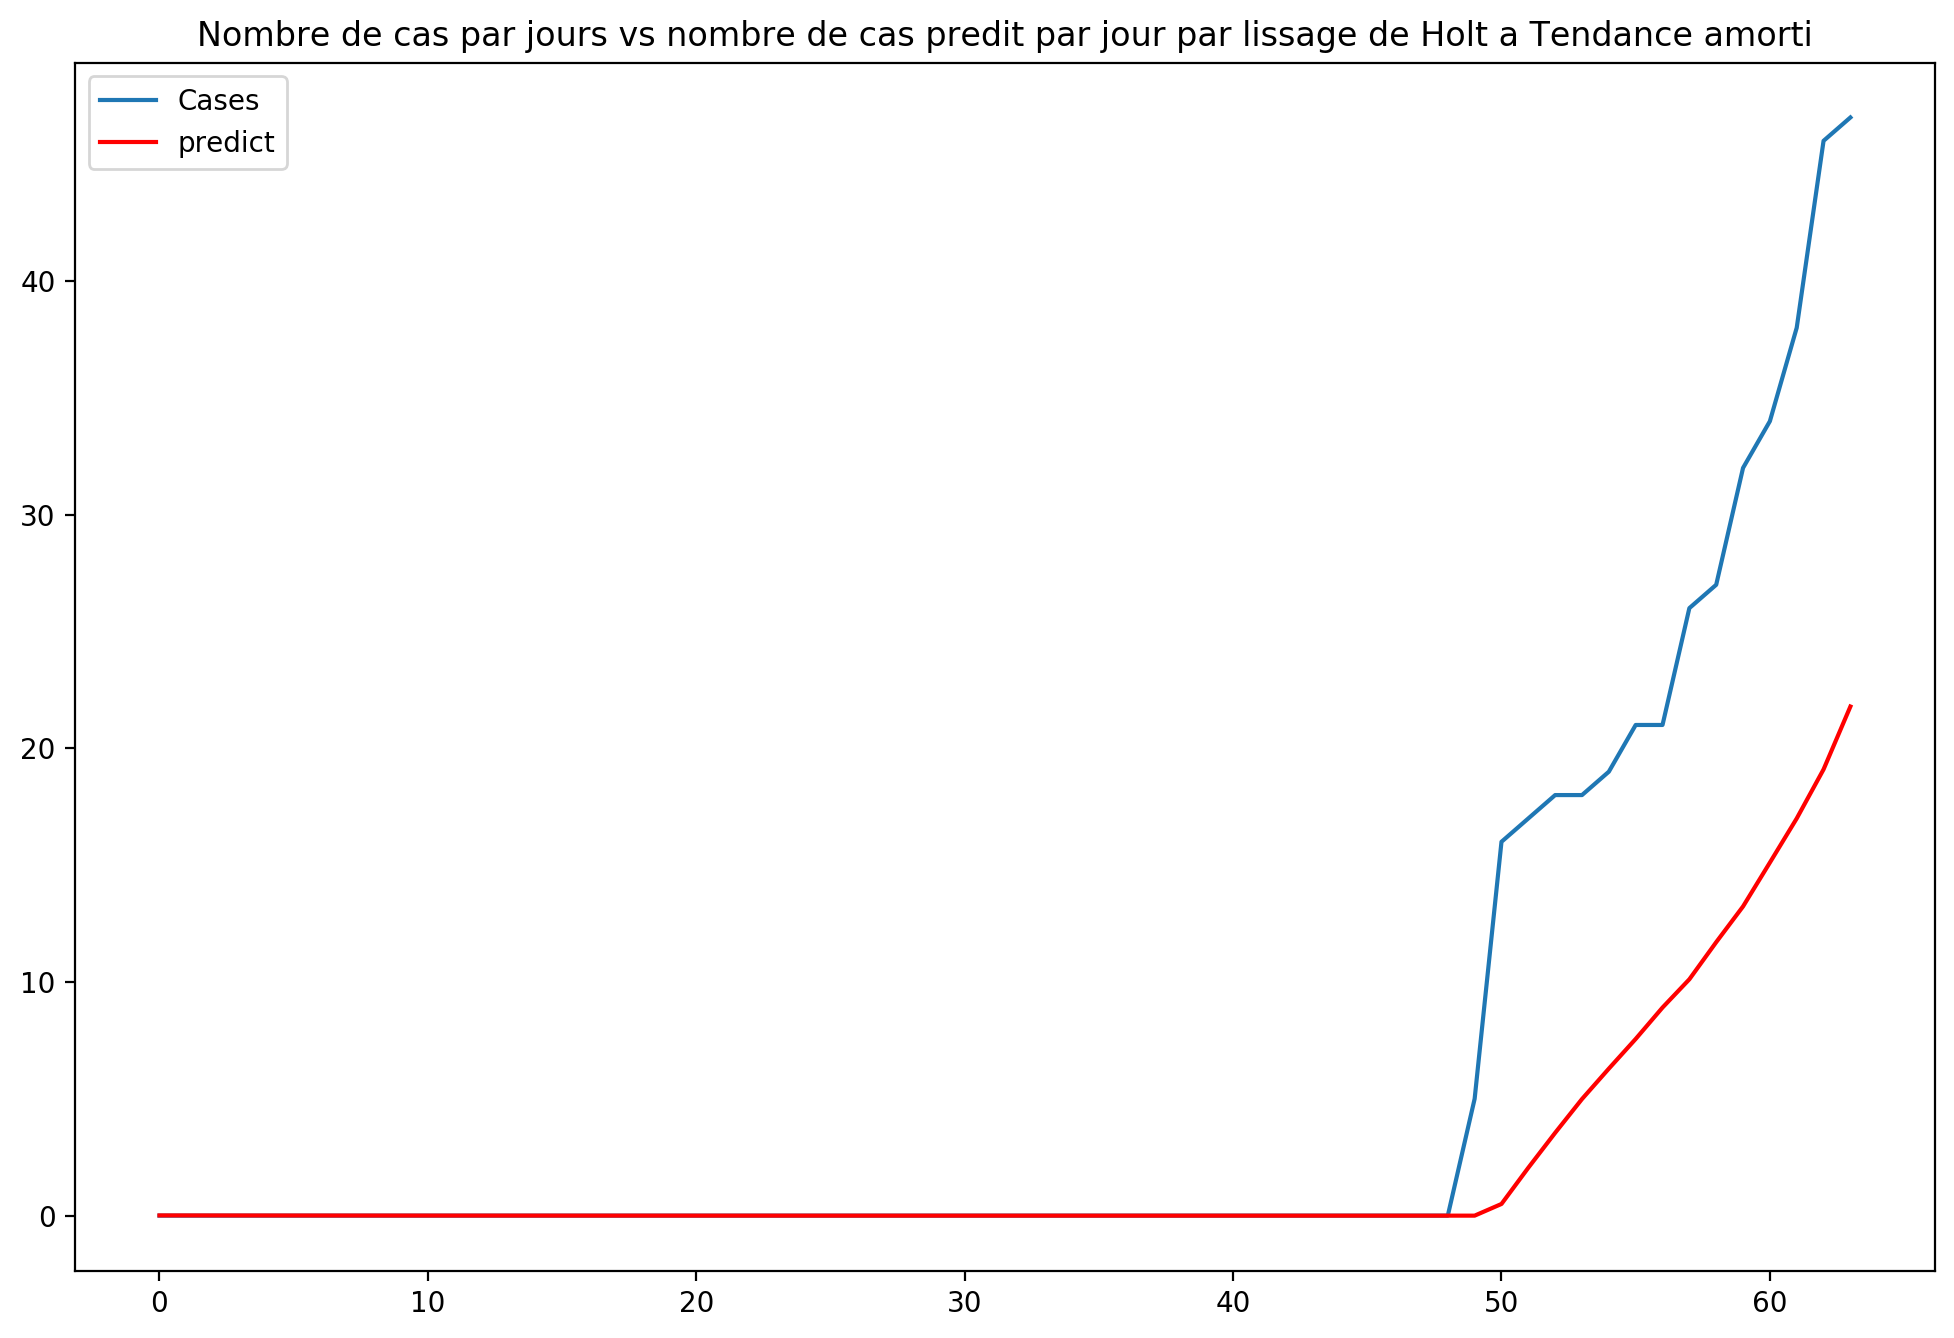

Les prévisions pour les 5 prochains jours sont:
64    24.310688
65    24.310688
66    24.310688
67    24.310688
68    24.310688
Name: Exponential trend, dtype: float64 


In [12]:
value_poss=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
from sklearn.metrics import mean_squared_error
mse_list=[]
params=[]
for i in value_poss:
    for j in value_poss:
        fit3 = Holt(cov['c_cont'], damped=True).fit(smoothing_level=i, smoothing_slope=j)
        fcast3 = fit3.forecast(5).rename("Additive damped trend")
        predicted=fit3.fittedvalues
        error = mean_squared_error(cov['c_jour'], predicted)
        mse_list.append(error)
        params.append((i,j))
ind=mse_list.index(min(mse_list))
#print(mse_list[ind],params[ind])
print('Le MSE minimal est {0} et la valeur de alpha et beta correspondantes sont {1}'.format(mse_list[ind],params[ind]))

fit3 = Holt(cov['c_cont'], damped=True).fit(smoothing_level=params[ind][0], smoothing_slope=params[ind][1])
#fcast3= fit3.forecast(5).rename("Exponential trend")
error = mean_squared_error(cov['c_cont'], predicted)
print( 'Le MSE est {}'.format(error))

# Visualisation de la prévision
plt.figure(figsize=(12,8),dpi=200)
plt.plot(cov['c_cont'], label="Cases") # la courbe des données réelles 
plt.plot(fit3.fittedvalues, label="predict",color='red')# la courbe des données prédites
plt.title("Nombre de cas par jours vs nombre de cas predit par jour par lissage de Holt a Tendance amorti")
plt.legend()
plt.show ()

fcast3 = fit3.forecast(5).rename("Exponential trend")
print( 'Les prévisions pour les 5 prochains jours sont:')
      
print('{} '.format(fcast3))

